Ideal: 0.790
> folds=2, accuracy=0.820 (0.820,0.820)
> folds=3, accuracy=0.741 (0.676,0.788)
> folds=4, accuracy=0.790 (0.760,0.800)
> folds=5, accuracy=0.790 (0.700,0.850)
> folds=6, accuracy=0.759 (0.562,0.875)
> folds=7, accuracy=0.781 (0.500,0.929)
> folds=8, accuracy=0.779 (0.583,0.923)
> folds=9, accuracy=0.801 (0.667,1.000)
> folds=10, accuracy=0.800 (0.600,0.900)
> folds=11, accuracy=0.802 (0.556,1.000)
> folds=12, accuracy=0.802 (0.625,0.875)
> folds=13, accuracy=0.798 (0.571,1.000)
> folds=14, accuracy=0.782 (0.571,1.000)
> folds=15, accuracy=0.827 (0.500,1.000)
> folds=16, accuracy=0.830 (0.500,1.000)
> folds=17, accuracy=0.818 (0.600,1.000)
> folds=18, accuracy=0.809 (0.600,1.000)
> folds=19, accuracy=0.800 (0.600,1.000)
> folds=20, accuracy=0.810 (0.400,1.000)
> folds=21, accuracy=0.819 (0.200,1.000)
> folds=22, accuracy=0.823 (0.600,1.000)
> folds=23, accuracy=0.833 (0.500,1.000)
> folds=24, accuracy=0.810 (0.500,1.000)
> folds=25, accuracy=0.830 (0.500,1.000)
> folds=26,

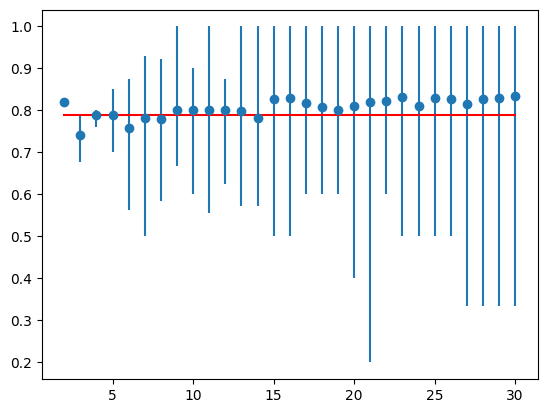

In [3]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# create the dataset
def get_dataset(n_samples=100):
    X, y = make_classification(n_samples=n_samples, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    return X, y

# retrieve the model to be evaluated
def get_model():
    model = LogisticRegression()
    return model

# evaluate the model using a given test condition
def evaluate_model(cv, X, y):
    # get the model
    model = get_model()
    # evaluate the model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # return scores
    return mean(scores), scores.min(), scores.max()

# calculate the ideal test condition
X, y = get_dataset()
ideal, _, _ = evaluate_model(StratifiedKFold(n_splits=5, shuffle=True, random_state=1), X, y)
print('Ideal: %.3f' % ideal)

# define folds to test
folds = range(2, 31)

# record mean and min/max of each set of results
means, mins, maxs = list(), list(), list()

# evaluate each k value
for k in folds:
    # define the test condition
    cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=1)
    # evaluate k value
    k_mean, k_min, k_max = evaluate_model(cv, X, y)
    # report performance
    print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
    # store mean accuracy
    means.append(k_mean)
    # store min and max relative to the mean
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)

# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')

# plot the ideal case in a separate color
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')

# show the plot
pyplot.show()
